<a href="https://colab.research.google.com/github/MohanR007/Exam-Study-Analysis/blob/main/Exam_Study_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
d = pd.read_csv('student_exam_data.csv')

In [3]:
d

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [4]:
d.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


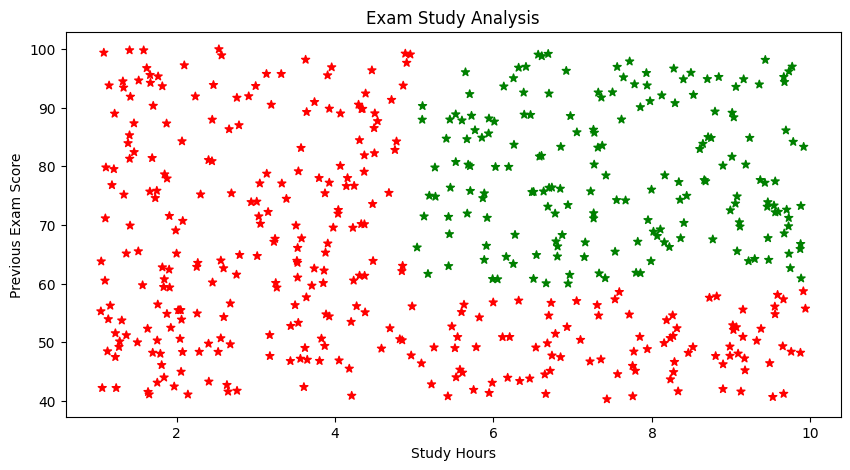

In [6]:
colors = ['green' if val == 1 else 'red' for val in d['Pass/Fail']]

plt.figure(figsize=(10,5))
plt.title("Exam Study Analysis")
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')

# Use scatter for color-based visualization
plt.scatter(d['Study Hours'], d['Previous Exam Score'], c=colors, marker='*')

plt.show()

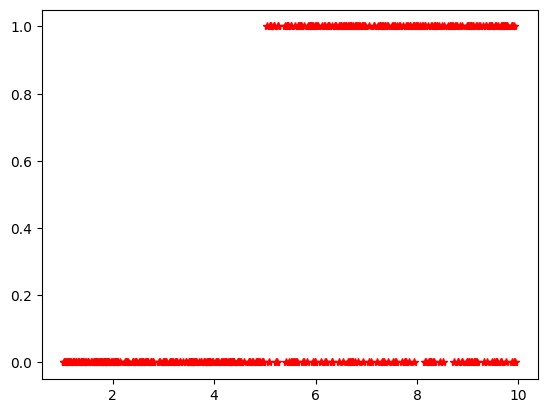

In [7]:
plt.plot(d['Study Hours'],d['Pass/Fail'],'r*')
plt.show()

In [8]:
x = d.drop('Pass/Fail',axis = 1) #axsis =1 for droping the column

In [9]:
y = d['Pass/Fail']

In [10]:
x

,Study Hours,Previous Exam Score
0,4.370861,81.889703
1,9.556429,72.165782
2,7.587945,58.571657
3,6.387926,88.827701
4,2.404168,81.083870
...,...,...
495,4.180170,45.494924
496,6.252905,95.038815
497,1.699612,48.209118
498,9.769553,97.014241


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.14,random_state=40)

In [13]:
xtrain

,Study Hours,Previous Exam Score
490,5.100911,87.964953
266,7.273142,85.747521
237,1.218844,88.995966
18,4.887505,99.236568
151,3.156057,72.226393
...,...,...
440,1.763539,56.443313
165,8.517722,49.171548
7,8.795585,89.352235
219,8.643011,83.852049


In [14]:
from sklearn.linear_model import LogisticRegression  #LogisticRegressionCV - for cross validation

In [15]:
LGR = LogisticRegression()
LGR

LogisticRegression()

In [16]:
LGR.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
pred = LGR.predict(xtest)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [18]:

ytest

167    0
169    0
461    1
253    0
42     0
      ..
15     0
402    0
309    0
4      0
285    0
Name: Pass/Fail, Length: 70, dtype: int64

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
acc = accuracy_score(pred,ytest)
acc

0.9142857142857143

In [21]:
student = np.array([7,80]).reshape(1,-1)
p = LGR.predict(student)
p

c:\Users\mohan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
import gradio as gr
def predict_pass_fail(study_hours, prev_score):
    student = np.array([study_hours, prev_score]).reshape(1, -1)
    prediction = LGR.predict(student)
    return "Pass" if prediction[0] == 1 else "Fail"

iface = gr.Interface(
    fn=predict_pass_fail,
    inputs=[gr.Number(label="Study Hours"), gr.Number(label="Previous Exam Score")],
    outputs=gr.Text(label="Result"),
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\Users\mohan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mohan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mohan\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
